# **Heart Disease Prediction Using Machine Learning**

In [22]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [ ]:
# Step 2: Load the Dataset
# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('hdp_data.csv')


In [ ]:
# Display the first few rows of the dataset to understand its structure
print("Dataset Head:")
print(df.head())


Dataset Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Step 3: Preprocess the Data
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)  # Features
y = df['target']                # Target variable

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the features


In [ ]:
# Step 4: Split the Data
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train the Logistic Regression Model
log_reg = LogisticRegression()  # Initialize the logistic regression model
log_reg.fit(X_train, y_train)   # Fit the model to the training data

LogisticRegression()

In [ ]:
# Step 6: Make Predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)  # Predictions from Logistic Regression

In [ ]:
# Step 7: Evaluate the Logistic Regression Model
print("\nLogistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_log_reg))  # Confusion Matrix
print(classification_report(y_test, y_pred_log_reg))  # Classification Report
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)  # Accuracy Score
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")


Logistic Regression Evaluation:
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Logistic Regression Accuracy: 0.85


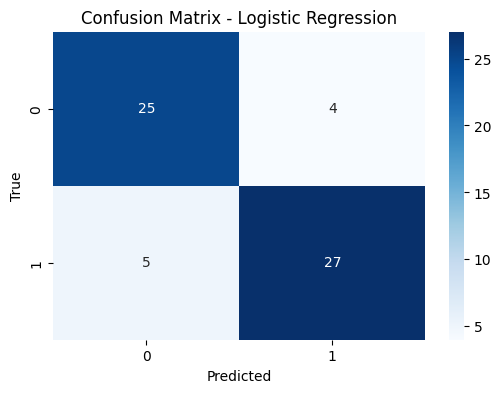

In [ ]:
# Step 8: Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Step 9: ROC Curve for Logistic Regression
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

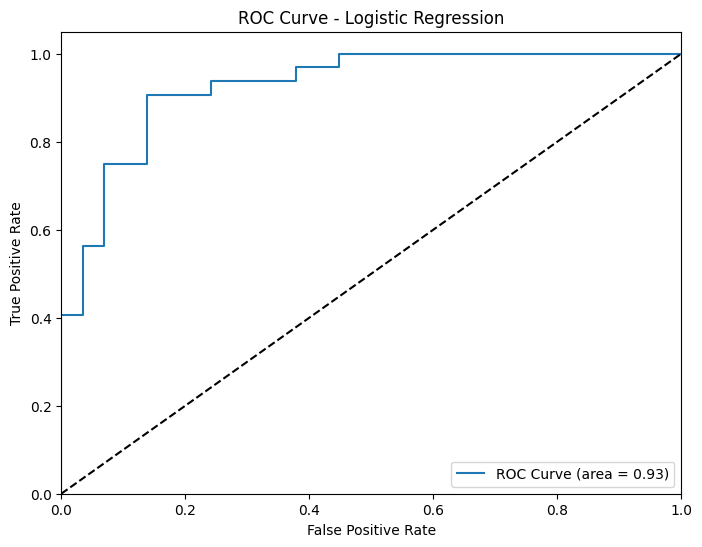

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 10: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn.fit(X_train, y_train)                   # Fit the model to the training data

KNeighborsClassifier()

In [ ]:
# Step 11: Make Predictions with KNN
y_pred_knn = knn.predict(X_test)  # Predictions from KNN

In [ ]:
# Step 12: Evaluate the KNN Model
print("\nKNN Evaluation:")
print(confusion_matrix(y_test, y_pred_knn))  # Confusion Matrix
print(classification_report(y_test, y_pred_knn))  # Classification Report
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Accuracy Score
print(f"KNN Accuracy: {accuracy_knn:.2f}")



KNN Evaluation:
[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

KNN Accuracy: 0.92


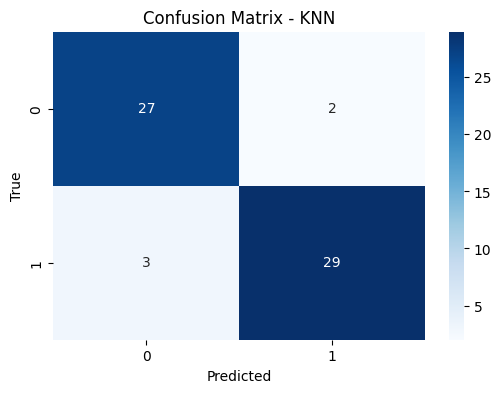

In [ ]:
# Step 13: Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Step 14: ROC Curve for KNN
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

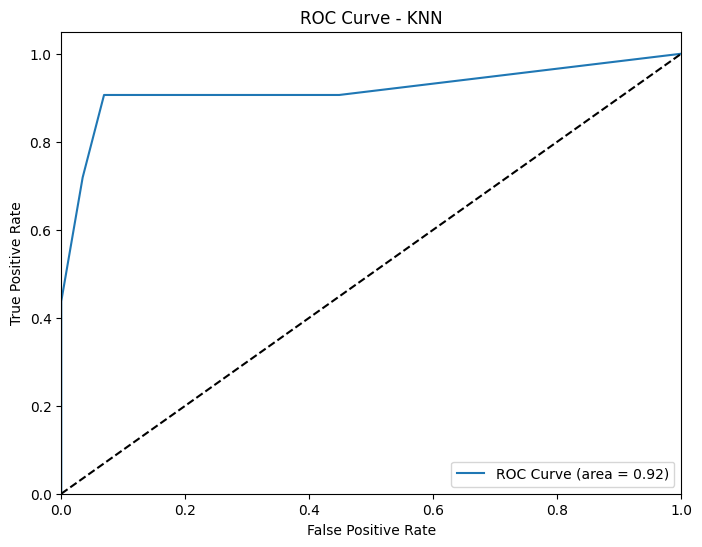

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC Curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()

In [23]:
# Initializing and training the SVM model
svm_model = SVC(kernel='linear')  # Try 'rbf' kernel if linear does not perform well
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
# Making predictions on the test set
y_pred = svm_model.predict(X_test)

In [25]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")


SVM Model Accuracy: 0.87


In [26]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



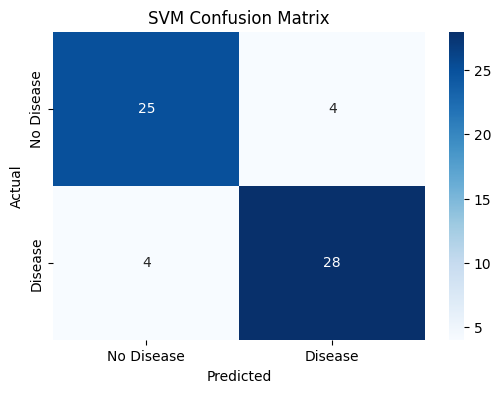

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [32]:
# Comparison of Model Accuracies
print("\nComparison of Model Accuracies:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print(f"SVM Accuracy: {accuracy:.2f}")


Comparison of Model Accuracies:
Logistic Regression Accuracy: 0.85
K-Nearest Neighbors Accuracy: 0.92
SVM Accuracy: 0.87


<ipython-input-33-ac38f4738a2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


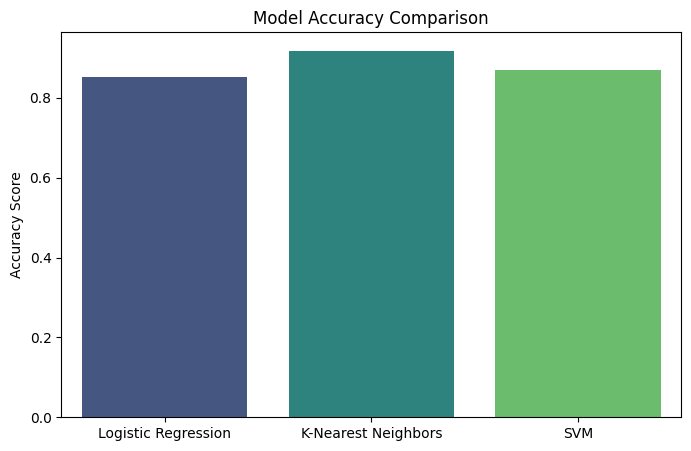

In [33]:
# Optional: Bar chart to visualize the accuracy of each model
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'SVM']
accuracies = [accuracy_log_reg, accuracy_knn, accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()